# Ford Motor Data Anomaly Detection with AutoEncoder

*The main goal of this project is prediction anomalies in the FORD A motor data using an autoencoder. It has a 500 hours univariate time series data obtained from sensors.*<br>


# Results

|                        	| Accuracy 	| Precision 	| Recall  	|
|------------------------	|----------	|-----------	|---------	|
| FORD A Validation Data 	| 68.65 %  	| 0.61634   	| 0.97199 	|
| FORD A Test Data       	| 66.14 %  	| 0.59284   	| 0.95931 	|

<br>

# References

- Wichard, Joerg. (2009). Classification of Ford Motor Data(http://www.j-wichard.de/publications/FordPaper.pdf)

- https://www.timeseriesclassification.com

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Convolution1DTranspose, Dropout, BatchNormalization, Dense,ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split

In [ ]:
# reading .arff file and converting dataframe
def arff_to_pd(path):
  data = loadarff(path)
  raw_data, meta_data = data

  cols = []
  for col_name in meta_data:
    cols.append(col_name)

  data2d = np.zeros([ raw_data.shape[0], len(cols) ])

  for row_number in range(raw_data.shape[0]):
    for col_number in range(len(cols)):
      data2d[row_number][col_number] = raw_data[row_number][col_number]

  df = pd.DataFrame(data2d, columns = cols)

  return df

In [ ]:
data = arff_to_pd('/content/drive/MyDrive/Colab Notebooks/GeneralDB/FordA/FordA_TRAIN.arff')
data.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att492,att493,att494,att495,att496,att497,att498,att499,att500,target
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0


In [ ]:
y = data.iloc[:,-1]
X = data.iloc[:, :-1]

# Label encoding -1,1 to 0,1
# 0s mean an anomaly in motor, 1s normal situation

LB = LabelEncoder()
y = LB.fit_transform(y)

In [ ]:
# Train test splitting

X_train, X_val, y_train, y_val = train_test_split(X,y , test_size = 0.2, random_state =5)

X_train = tf.cast(X_train, tf.float32)
X_val = tf.cast(X_val, tf.float32)

In [ ]:
# Seperate data into normal and anormal

train_labels = y_train.astype(bool)
normal_X_train = X_train[train_labels]
anormal_X_train = X_train[~train_labels]

print("Normal train shape : ",normal_X_train.shape)
print("Anormal train shape : ",anormal_X_train.shape)


val_labels = y_val.astype(bool)
normal_X_val = X_val[val_labels]
anormal_X_val = X_val[~val_labels]

print("Normal validation shape : ",normal_X_val.shape)
print("Anormal validation shape : ",anormal_X_val.shape)

Normal train shape :  (1398, 500)
Anormal train shape :  (1482, 500)
Normal validation shape :  (357, 500)
Anormal validation shape :  (364, 500)


In [ ]:
inp = Input(shape = normal_X_train.shape[1:])

D1 = Dense(128, activation = 'relu' )(inp)
D1 = BatchNormalization()(D1)

D2 = Dense(64, activation = 'relu' )(D1)
D2 = BatchNormalization()(D2)

D3 = Dense(32, activation = 'relu' )(D2)
D3 = BatchNormalization()(D3)

D4 = Dense(64, activation = 'relu' )(D3)
D4 = BatchNormalization()(D3)

D5 = Dense(128, activation = 'relu' )(D4)
D5 = BatchNormalization()(D5)

out = Dense(500, activation = 'sigmoid')(D5)

model = Model(inputs = inp, outputs=out)
model.compile( optimizer = 'adam', loss = 'mae', metrics=['mae'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 128)               64128     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080  

In [ ]:
my_callback = [EarlyStopping(patience = 30),
               ReduceLROnPlateau(factor=0.5, patience=15)]


hist = model.fit(normal_X_train, normal_X_train, epochs = 350,
                 validation_data = (normal_X_val,normal_X_val)
                 ,batch_size = 32, callbacks =[my_callback], shuffle=True)

Epoch 1/350
44/44 [==============================] - 13s 33ms/step - loss: 0.8711 - mae: 0.8711 - val_loss: 0.8614 - val_mae: 0.8614 - lr: 0.0010
Epoch 2/350
44/44 [==============================] - 1s 12ms/step - loss: 0.8113 - mae: 0.8113 - val_loss: 0.8160 - val_mae: 0.8160 - lr: 0.0010
Epoch 3/350
44/44 [==============================] - 0s 11ms/step - loss: 0.7805 - mae: 0.7805 - val_loss: 0.7890 - val_mae: 0.7890 - lr: 0.0010
Epoch 4/350
44/44 [==============================] - 1s 12ms/step - loss: 0.7541 - mae: 0.7541 - val_loss: 0.7583 - val_mae: 0.7583 - lr: 0.0010
Epoch 5/350
44/44 [==============================] - 1s 12ms/step - loss: 0.7273 - mae: 0.7273 - val_loss: 0.7295 - val_mae: 0.7295 - lr: 0.0010
Epoch 6/350
44/44 [==============================] - 0s 10ms/step - loss: 0.7091 - mae: 0.7091 - val_loss: 0.7134 - val_mae: 0.7134 - lr: 0.0010
Epoch 7/350
44/44 [==============================] - 0s 8ms/step - loss: 0.6984 - mae: 0.6984 - val_loss: 0.7036 - val_mae: 0.703

44/44 [==============================] - 0s 2ms/step
0.6674597859382629


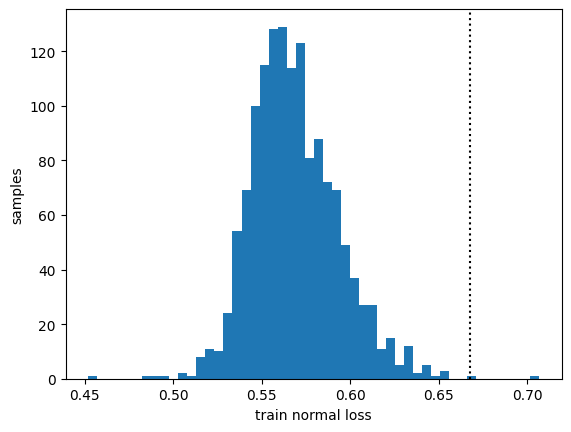

In [ ]:
train_reconstruct = model.predict(normal_X_train)
train_reconstruct_loss = tf.keras.losses.mae(train_reconstruct, normal_X_train)


threshold = np.mean(train_reconstruct_loss) + 4*np.std(train_reconstruct_loss)
print(threshold)

plt.hist(train_reconstruct_loss, bins = 50)
plt.xlabel("train normal loss")
plt.ylabel("samples")
plt.axvline(threshold, color ='black', linestyle='dotted')

12/12 [==============================] - 0s 2ms/step


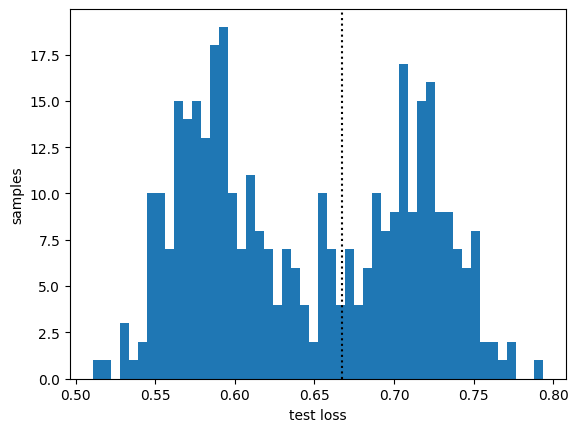

In [ ]:
test_anormal_reconstruct = model.predict(anormal_X_val)
test_anormal_reconstruct_loss = tf.keras.losses.mae(test_anormal_reconstruct, anormal_X_val )


plt.hist(test_anormal_reconstruct_loss, bins = 50)
plt.xlabel("test loss")
plt.ylabel("samples")
plt.axvline(threshold, color = 'black', linestyle = 'dotted')

In [ ]:
prediction_val = model.predict(X_val)
val_full_loss = tf.keras.losses.mae(prediction_val, X_val)

result = tf.math.less(val_full_loss, threshold)

acc = metrics.accuracy_score(y_val, result)*100
precision = metrics.precision_score(y_val, result)
recall = metrics.recall_score(y_val, result)

print('Accuracy :{0:.2f} %'.format(acc))
print('Precision :{0:.5f}'.format(precision))
print('Recall :{0:.5f}'.format(recall))


23/23 [==============================] - 0s 2ms/step
Accuracy :68.65 %
Precision :0.61634
Recall :0.97199


In [ ]:
y_test_ = pd.DataFrame(y_val)
y_test_.value_counts()

0    364
1    357
dtype: int64

Test data

In [ ]:
data_test = arff_to_pd('/content/drive/MyDrive/Colab Notebooks/GeneralDB/FordA/FordA_TEST.arff')
data_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att492,att493,att494,att495,att496,att497,att498,att499,att500,target
0,-0.140402,0.171641,0.302044,0.232804,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,-0.367280,...,0.390903,0.974831,1.258717,1.143316,0.647092,-0.049582,-0.690402,-0.976596,-0.794263,-1.0
1,0.334038,0.322253,0.453844,0.671852,0.887897,1.020469,1.059750,1.030290,0.950746,0.858436,...,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659,-1.0
2,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,-0.301032,...,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612,-1.0
3,1.240282,1.331189,1.386596,1.383220,1.305979,1.142784,0.878613,0.532291,0.140025,-0.258262,...,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,-1.011328,-0.931222,-0.934498,-1.001288,1.0
4,-1.159478,-1.204174,-1.167605,-1.033518,-0.818166,-0.558119,-0.299291,-0.093691,0.022770,0.044337,...,0.441438,0.206176,-0.006941,-0.146919,-0.183082,-0.112382,0.008987,0.131413,0.186266,-1.0


In [ ]:
X_test = data_test.iloc[:,0:-1]
y_test = data_test.iloc[:,-1]

y_test = LB.fit_transform(y_test)


In [ ]:
prediction_test = model.predict(X_test)
test_full_loss = tf.keras.losses.mae(prediction_test, X_test)

result = tf.math.less(test_full_loss, threshold)

acc = metrics.accuracy_score(y_test, result)*100
precision = metrics.precision_score(y_test, result)
recall = metrics.recall_score(y_test, result)

print('Accuracy :{0:.2f} %'.format(acc))
print('Precision :{0:.5f}'.format(precision))
print('Recall :{0:.5f}'.format(recall))


42/42 [==============================] - 0s 3ms/step
Accuracy :66.14 %
Precision :0.59284
Recall :0.95931


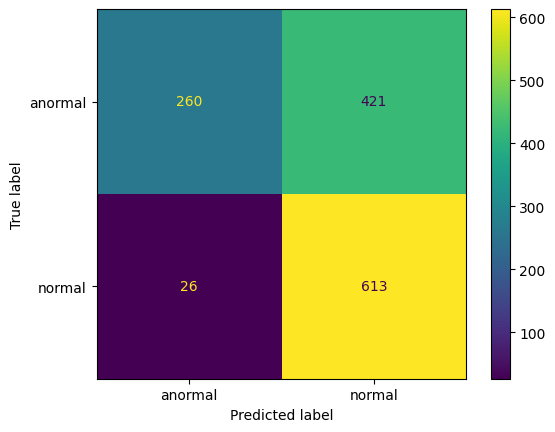

In [ ]:
cm = metrics.confusion_matrix(y_test,result )

disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['anormal','normal'])
disp.plot()